# Video Games Rating By "ESRB"

## 1 - Intro

### 1.1 - What is ESRB?

#### **According to Wikipedia:**

The **Entertainment Software Rating Board (ESRB)** is a **self-regulatory** organization that **assigns age and content ratings to consumer video games** in North America. The ESRB was **established in 1994 by the Entertainment Software Association** (ESA, formerly the Interactive Digital Software Association (IDSA)), **in response to criticism of controversial video games with excessively violent or sexual content**, particularly after the 1993 congressional hearings following the releases of Mortal Kombat and Night Trap for home consoles and Doom for home computers. The industry, pressured with potential government oversight of video game ratings from these hearings, established both the IDSA and the ESRB within it to create a voluntary ratings system based on the Motion Picture Association of America film rating system with additional considerations for video game interactivity.
 
 Link for the full article: https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board

<img src="\pics\foto1.jpg" alt="Mom and kids with tablet" width="600"/>

Photo courtesy of Alexander Dummer on Unsplash.

## 2 - Problem Definition

Could we create a machine learning model that predicts the ESRB rating for a videogame based on it's descriptors?

## 3 - Data

We have data from 1895 games already rated by the ESRB in different categories. 

We have have the following columns in our database:

- **title**: Name of the video game (plain text).

- **console**: Checks if the video game has a console version (binary value).

- **alcohol_reference**: Checks if the video game makes reference to and/or images of alcoholic beverages (binary vector).

- **animated_blood**: Checks if the video game has discolored and/or unrealistic depictions of blood (binary vector).

- **blood**: Checks if the video game has depictions of blood (binary vector).

- **blood_and_gore**: Checks if the video game has depictions of blood or the mutilation of body parts (binary vector).

- **cartoon_violence**: Checks if the video game has violent actions involving cartoon-like situations and characters. May include violence where a character is unharmed after the action has been inflicted (binary vector).

- **crude_humor**: Checks if the video game has depictions or dialogue involving vulgar antics, including "bathroom" humor (binary vector).

- **drug_reference**: Checks if the video game has reference to and/or images of illegal drugs (binary vector).

- **fantasy_violence** Checks if the video game has violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life (binary vector).

- **intense_violence**: Checks if the video game has graphic and realistic-looking depictions of physical conflict. May involve extreme and/or realistic blood, gore, weapons and depictions of human injury and death (binary vector).

- **language**: Checks if the video game has mild to moderate use of profanity (binary vector).

- **lyrics**: Checks if the video game has mild references to profanity, sexuality, violence, alcohol or drug use in music (binary vector).

- **mature_humor**: Checks if the video game has depictions or dialogue involving "adult" humor, including sexual references (binary vector).

- **mild_blood**: Checks if the video game has low frequency, intensity or severity depictions of blood (binary vector).

- **mild_cartoon_violence**: Checks if the video game has low frequency, intensity or severity violent actions involving cartoon-like situations and characters. May include violence where a character is unharmed after the action has been inflicted (binary vector).

- **mild_fantasy_violence**: Checks if the video game has low frequency, intensity or severity violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life (binary vector).

- **mild_language**: Checks if the video game has low frequency, intensity or severity use of profanity (binary vector).

- **mild_lyrics**: Checks if the video game has low frequency, intensity or severity references to profanity, sexuality, violence, alcohol or drug use in music (binary vector).

- **mild_suggestive_themes**: Checks if the video game has low frequency, intensity or severity provocative references or materials (binary vector).

- **mild_violence**: Checks if the video game has mild scenes involving aggressive conflict. May contain bloodless dismemberment (binary vector).

- **no_descriptors**: Checks if the video game does not have any of the descriptors (binary vector).

- **nudity**: Checks if the video game has graphic or prolonged depictions of nudity (binary vector).

- **partial_nudity**: Checks if the video game has brief and/or mild depictions of nudity (binary vector).

- **sexual_content**: Checks if the video game has non-explicit depictions of sexual behavior, possibly including partial nudity (binary vector).

- **sexual_themes**: Checks if the video game has references to sex or sexuality (binary vector).

- **simulated_gambling**: Checks if the video game has a feature that allows the player to gamble without betting or wagering real cash or currency (binary vector).

- **strong_language**: Checks if the video game has explicit and/or frequent use of profanity (binary vector).

- **strong_sexual_content**: Checks if the video game has explicit and/or frequent depictions of sexual behavior, possibly including nudity (binary vector).

- **suggestive_themes**: Checks if the video game has mild provocative references or materials (binary vector).

- **use_of_alcohol**: Checks if the video game has the consumption of alcoholic beverages (binary vector).

- **use_of_drugs_and_alcohol**: Checks if the video game has the consumption or use of illegal drugs and alcohol (binary vector).

- **violence**: Checks if the video game has scenes involving aggressive conflict. May contain bloodless dismemberment (binary vector).

- **esrb_rating**: ESRB rating of the video game (plain text - more info below).

The ESRB ratings are as follows:

- **E**: Everyone. Content is generally suitable for all ages. May contain minimal cartoon, fantasy or mild violence and/or infrequent use of mild language.

- **ET**: Everyone 10+. Content is generally suitable for ages 10 and up. May contain more cartoon, fantasy or mild violence, mild language and/or minimal suggestive themes.

- **T**: Teen. Content is generally suitable for ages 13 and up. May contain violence, suggestive themes, crude humor, minimal blood, simulated gambling and/or infrequent use of strong language.

- **M**: Mature 17+. Content is generally suitable for ages 17 and up. May contain intense violence, blood and gore, sexual content and/or strong language.

## 4 - Evaluation

Letting a video game aimed for a more mature audience reach a younger crowd is a **very grave** offense.

Therefore, the desired accuracy for the model should be **above 90%**.

Cases where the model labels a game with age restrictions with less severity than it should **must not happen**.

## 5 - Exploratory Data Analysis (EDA):

### 5.1 - First steps

#### 5.1.1 - Necessary libraries

In [1]:
import pandas as pd 
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

#### 5.1.2 - Importing the dataframe

In [2]:
df = pd.read_csv("data/Video_games_esrb_rating.csv")

In [3]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Correcting a small typo in the original dataframe

In [4]:
df = df.rename(columns={"strong_janguage": "strong_language"})

In [5]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


#### 5.1.3 - Dataframe checks

Checking for null values

In [6]:
df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_language             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

Checking the data types on the dataframe

In [7]:
df.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_language              int64
strong_sexual_conten

Checking if the int64 variables have only 0's and 1's

In [8]:
col_val = pd.DataFrame()
col_val = df.drop(["title", "esrb_rating"], axis=1)

In [9]:
unique_val = np.unique(col_val)
unique_val

array([0, 1], dtype=int64)

In [10]:
del col_val, unique_val

Checking if we have repeated video game titles

In [11]:
df["title"].is_unique

True

#### 5.1.4 - Visualizations

##### 5.1.4.1 - Principal Component Analysis (PCA)

In [12]:
df_vis_x = df.drop("esrb_rating",axis = 1)
df_vis_x.set_index("title", inplace=True)
df_vis_y = df["esrb_rating"]

In [13]:
scaler = StandardScaler()

In [14]:
df_vis_scaled_x = scaler.fit_transform(df_vis_x)

In [15]:
df_vis_scaled_x

array([[ 1.05034216, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554],
       [ 1.05034216, -0.22973415,  9.93664139, ..., -0.12682977,
        -0.12682977, -0.26116554],
       [ 1.05034216, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554],
       ...,
       [-0.95207071, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554],
       [-0.95207071, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554],
       [ 1.05034216, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554]])

In [16]:
pca = PCA(n_components=2)

In [17]:
principal_components = pca.fit_transform(df_vis_scaled_x)

In [18]:
principaldf = pd.DataFrame(data = principal_components,
                           columns = ["pc1", "pc2"])

In [19]:
principaldf

,pc1,pc2
0,-1.048584,0.516976
1,0.813061,3.572470
2,1.262105,-1.926876
3,-1.216686,-1.397365
4,-0.836328,-1.719207
...,...,...
1890,2.112693,-2.984658
1891,-0.873749,-1.171977
1892,-1.227434,0.250884
1893,-0.205355,-0.774934


In [20]:
finaldf = pd.concat([principaldf, df_vis_y], axis = 1)

In [21]:
finaldf

,pc1,pc2,esrb_rating
0,-1.048584,0.516976,E
1,0.813061,3.572470,ET
2,1.262105,-1.926876,M
3,-1.216686,-1.397365,ET
4,-0.836328,-1.719207,T
...,...,...,...
1890,2.112693,-2.984658,M
1891,-0.873749,-1.171977,T
1892,-1.227434,0.250884,E
1893,-0.205355,-0.774934,T


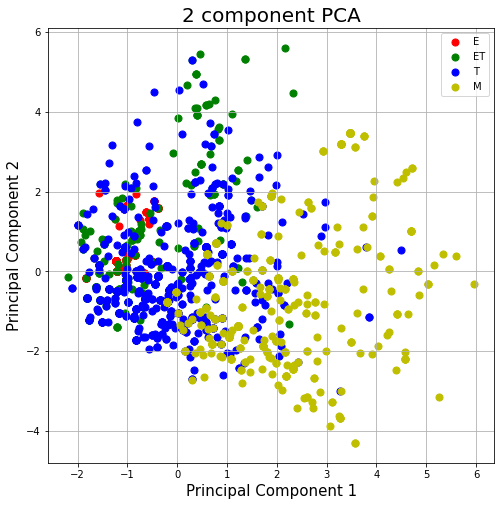

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["E", "ET", "T", "M"]
colors = ["r", "g", "b", "y"]
for target, color in zip(targets,colors):
    indicesToKeep = df_vis_y == target
    ax.scatter(finaldf.loc[indicesToKeep, "pc1"]
               , finaldf.loc[indicesToKeep, "pc2"]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

##### 5.1.4.2 - Correlation Matrix

In [23]:
one_hot = pd.get_dummies(df["esrb_rating"])

In [24]:
df_heat = df.drop("esrb_rating", axis=1)

In [25]:
df_heat = df_heat.join(one_hot)

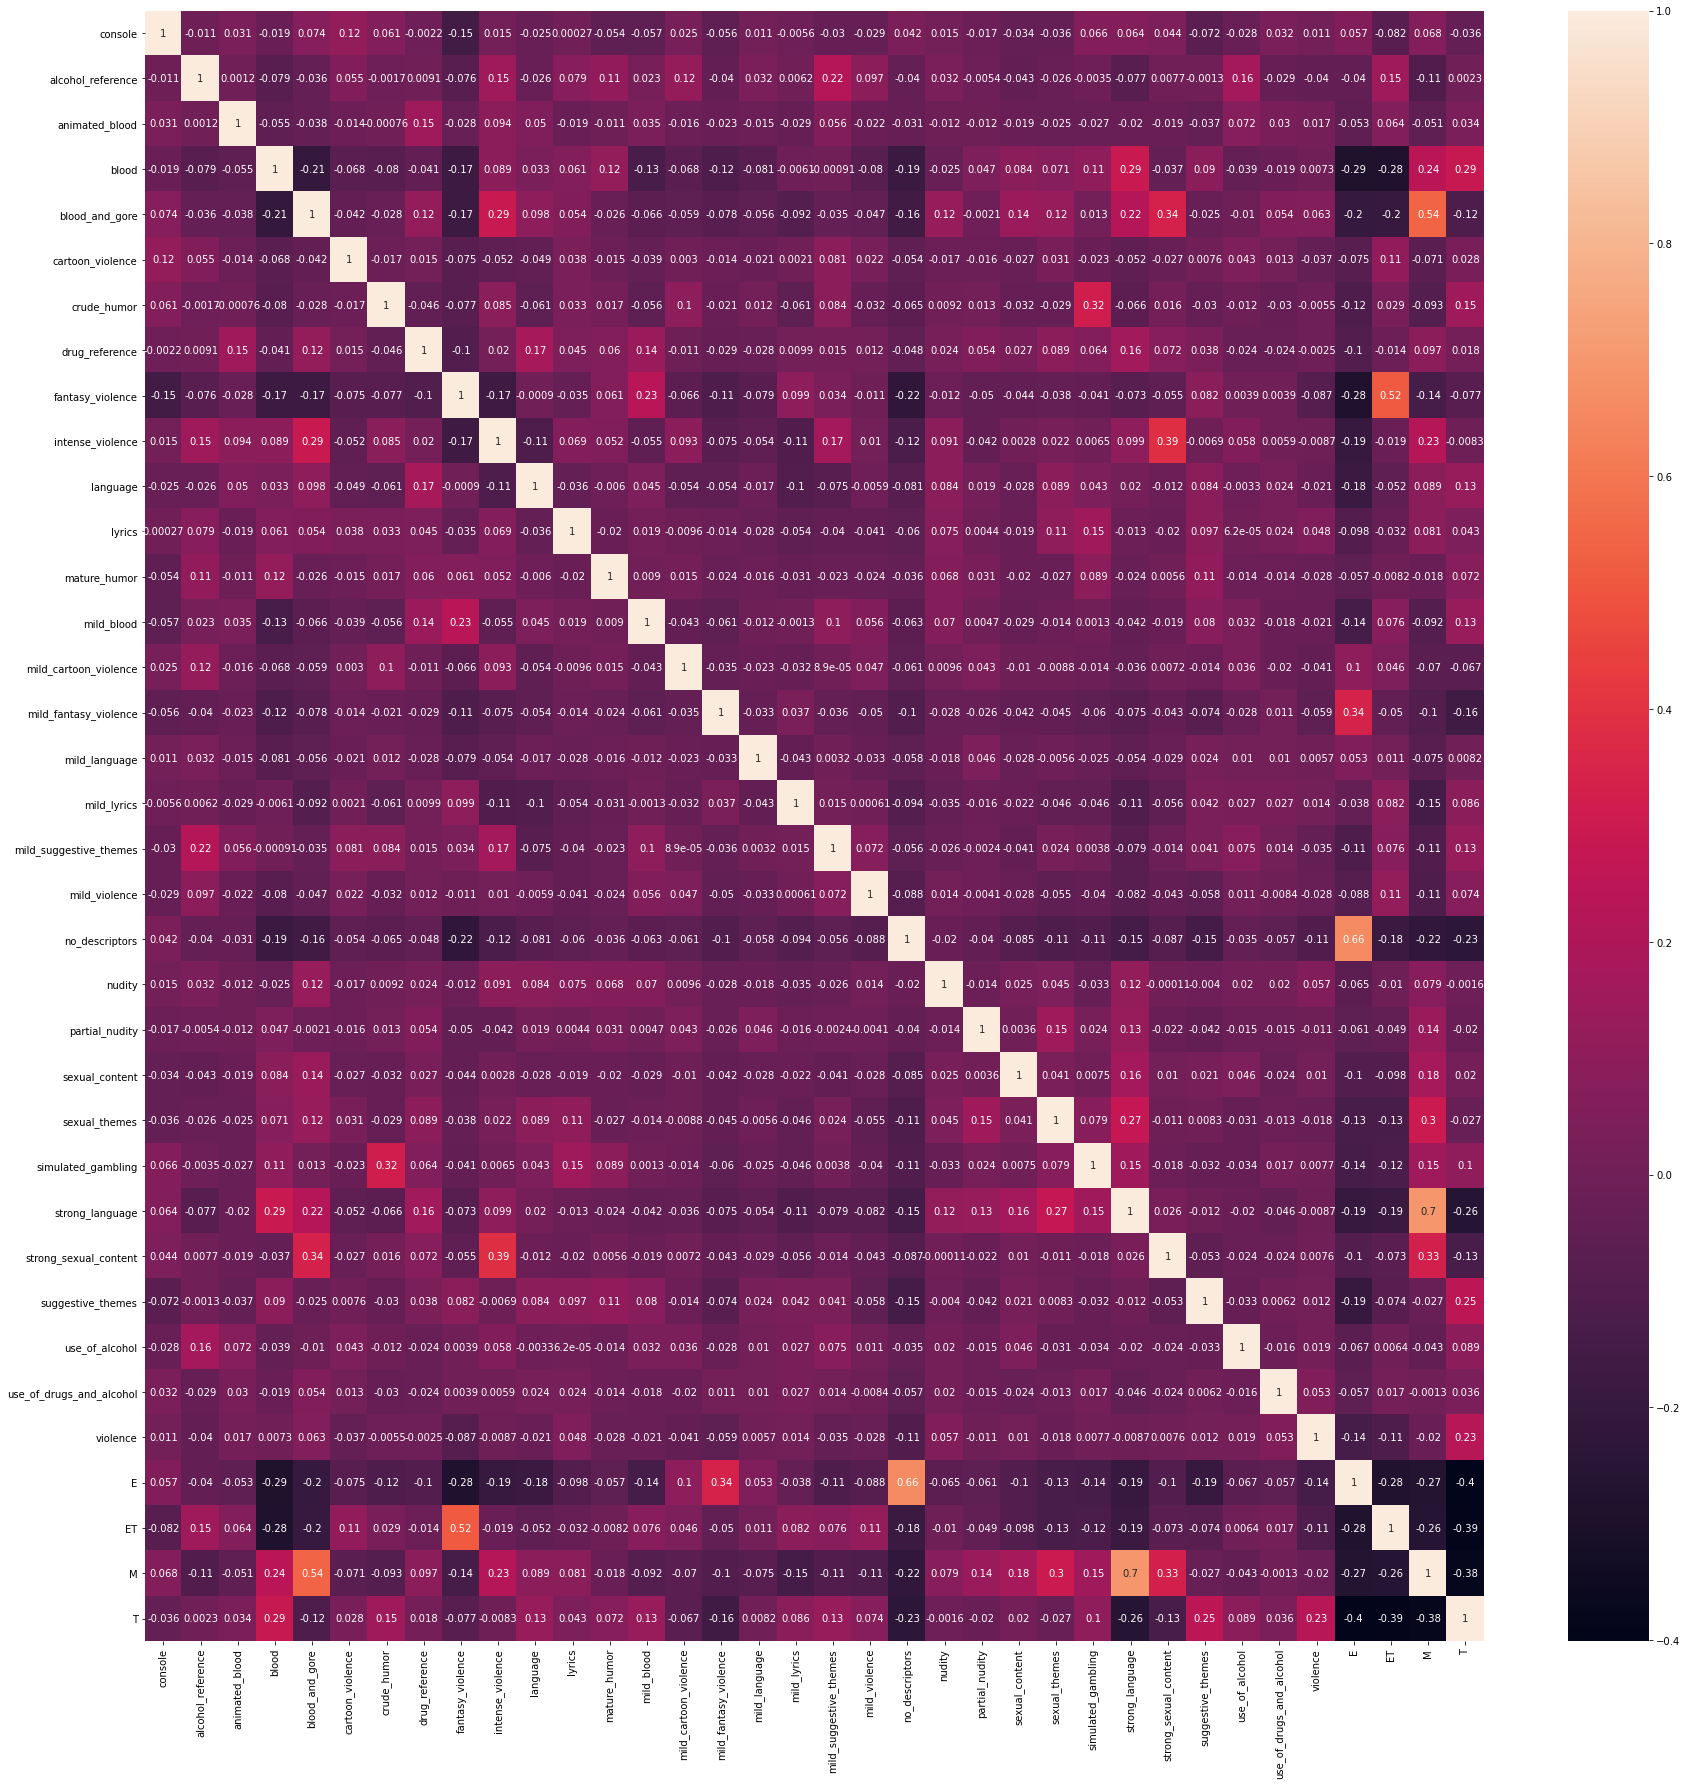

In [26]:
cor_matrix = df_heat.corr()
ax = plt.subplots(figsize=(30,30))
sns.heatmap(cor_matrix, annot=True);

##### 5.1.4.3 - Number of games by ESRB rating

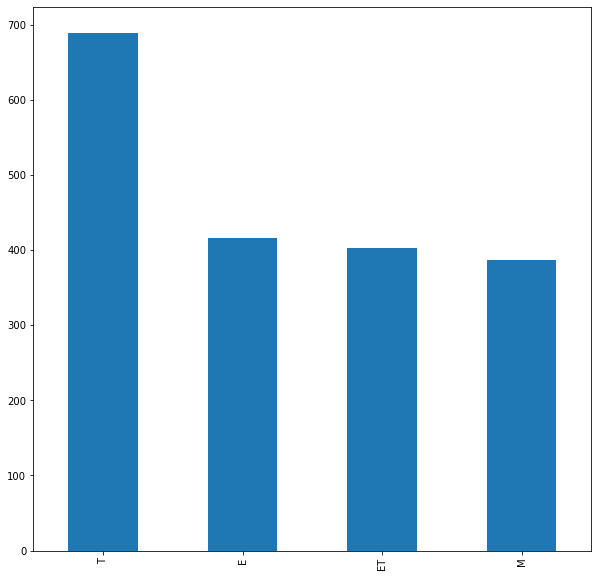

In [27]:
ax = plt.subplots(figsize=(10,10))
df["esrb_rating"].value_counts().plot.bar();

##### 5.1.4.4 - Number of the top 10 in the database

In [28]:
df_desc = df.drop(columns=["title", "esrb_rating"], axis=1)

In [29]:
df_desc = df_desc.sum()

In [30]:
df_desc = df_desc.reset_index() 

In [31]:
df_desc.rename(columns={"index" : "Descriptors", 0 : "Count"}, inplace=True)

In [32]:
df_desc.sort_values("Count", ascending=False, inplace=True)

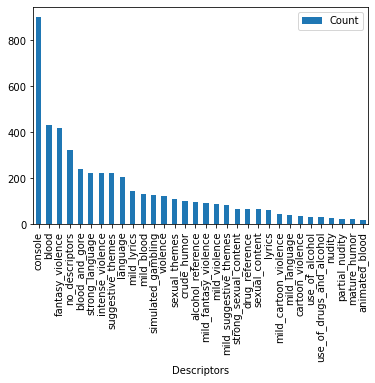

In [33]:
df_desc.plot.bar(x="Descriptors", y="Count");

## 6 - Machine Learning Model:

### 6.1 - First Steps

In [34]:
clf = SGDClassifier()

### 6.2 - Working the data

In [35]:
df_x = df.drop(columns=["esrb_rating","title"], axis=1)
df_y = df["esrb_rating"]
df_test = pd.read_csv("data/test_esrb.csv")
df_test_x = df_test.drop(columns=["esrb_rating", "title"], axis=1)
df_test_y = df_test["esrb_rating"]

### 6.3 - Fitting the model

In [36]:
clf.fit(df_x, df_y)

SGDClassifier()

### 6.4 - Model evaluation

In [37]:
clf.score(df_test_x, df_test_y)

0.802

In [38]:
cross_val_score(clf, df_x, df_y, cv=10)

array([0.76842105, 0.83684211, 0.8       , 0.82631579, 0.82105263,
       0.85185185, 0.84656085, 0.87301587, 0.89417989, 0.84656085])

In [39]:
preds = clf.predict(df_test_x)

In [40]:
print(classification_report(df_test_y, preds))

              precision    recall  f1-score   support

           E       0.96      0.95      0.95       100
          ET       0.82      0.80      0.81       126
           M       0.87      0.58      0.69        90
           T       0.70      0.83      0.76       184

    accuracy                           0.80       500
   macro avg       0.84      0.79      0.81       500
weighted avg       0.81      0.80      0.80       500



In [41]:
labels = ["M", "T", "ET", "E"]

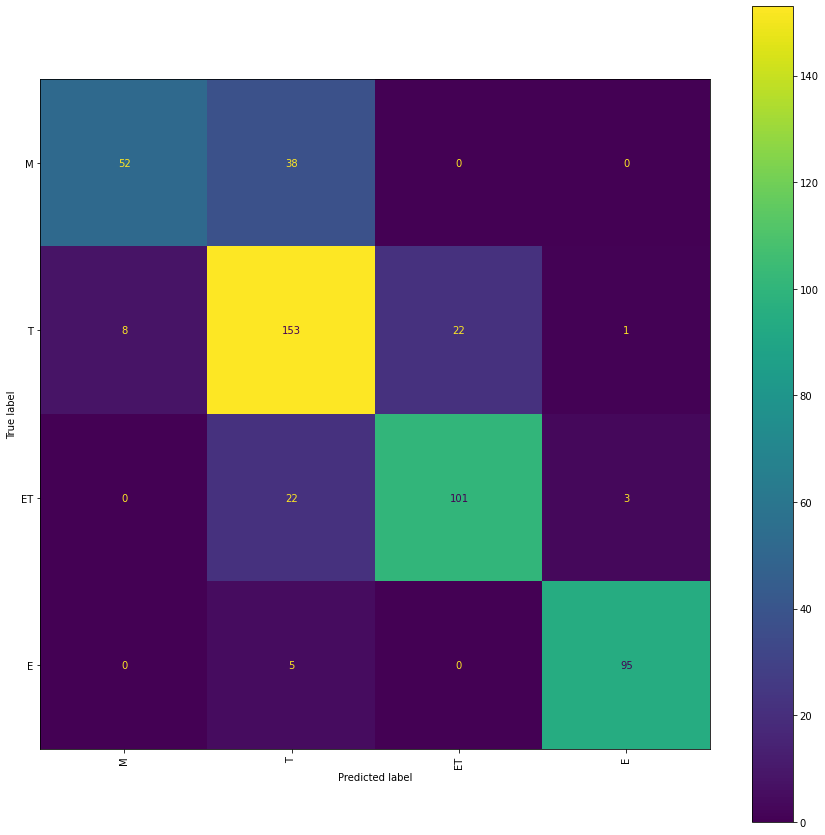

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))
metrics.plot_confusion_matrix(clf, df_test_x,df_test_y, labels=labels, xticks_rotation="vertical", ax=ax)

### 6.5 - Trying with a different model:

In [43]:
clf2 = DecisionTreeClassifier(criterion="entropy")

In [44]:
clf2.fit(df_x, df_y)

DecisionTreeClassifier(criterion='entropy')

In [45]:
clf2.score(df_test_x, df_test_y)

0.852

In [46]:
cross_val_score(clf2, df_x, df_y, cv=10)

array([0.77368421, 0.81578947, 0.86842105, 0.9       , 0.82105263,
       0.87301587, 0.87301587, 0.85714286, 0.87830688, 0.86243386])

In [47]:
preds2 = clf2.predict(df_test_x)

In [48]:
print(classification_report(df_test_y, preds2))

              precision    recall  f1-score   support

           E       0.94      0.95      0.95       100
          ET       0.83      0.89      0.86       126
           M       0.86      0.73      0.79        90
           T       0.82      0.83      0.82       184

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



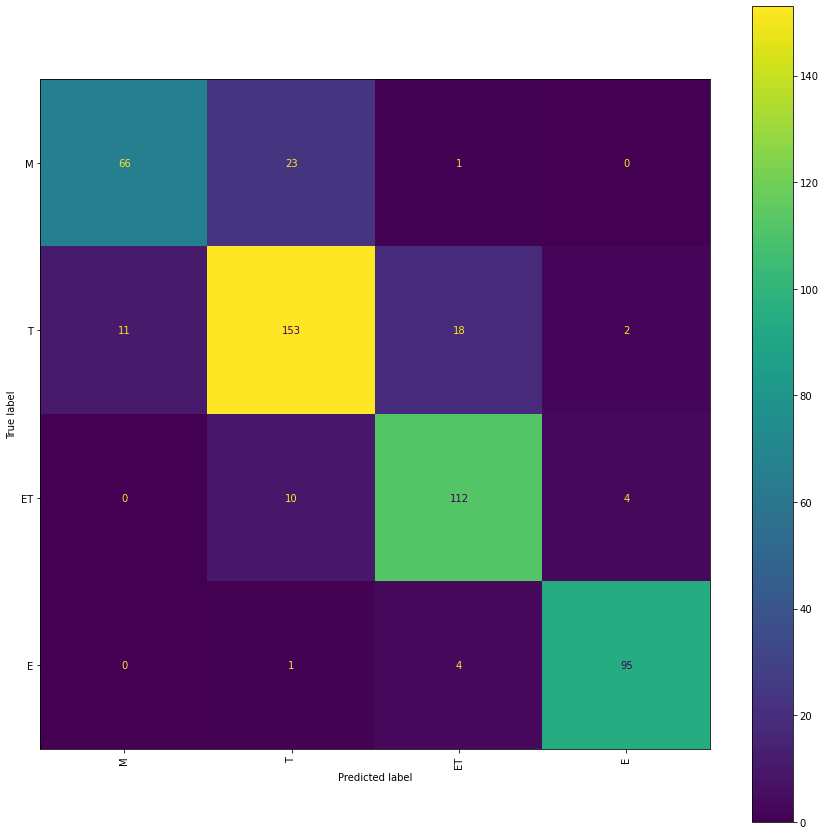

In [49]:
fig, ax = plt.subplots(figsize=(15, 15))
metrics.plot_confusion_matrix(clf2, df_test_x,df_test_y, labels=labels, xticks_rotation="vertical", ax=ax)

## 7 - Conclusion

Even though the model couln't reach the desired accuracy of above 90%, it came close at 85% and only a few games aimed at older crowds being classified as being ok for a younger audience. 

Next steps: Hyperparameter tuning and possibly better model selection.